<a href="https://colab.research.google.com/github/Abd-elr4hman/Machine-Learning-Algorithms/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [47]:
# create dataset
x,y= datasets.make_classification(n_samples= 1000, n_features=10, n_classes=2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

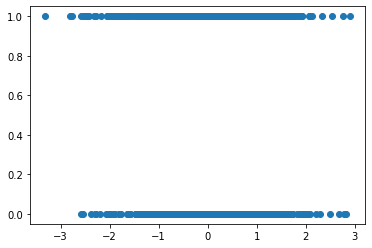

In [48]:
# plot dataset
plt.scatter(x[:, 0],y)

In [49]:
class Naive_Bayes:
  def fit(self, x, y):
    self.classes= np.unique(y)
    self.n_classes= len(self.classes)
    self.n_examples, self.n_features= x_train.shape

    # instantiate mean, var, prior for each class
    self.mean= np.zeros((self.n_classes, self.n_features), dtype= np.float64)
    self.var= np.zeros((self.n_classes, self.n_features), dtype= np.float64)
    self.priors= np.zeros(self.n_classes, dtype= np.float64)

    # calculate mean, var for each feature, prior for each class 
    for index, c in enumerate(self.classes):
      x_class= x[y==c]
      self.mean[index,:]= x_class.mean(axis= 0)
      self.var[index,:]= x_class.var(axis=0)
      self.priors[index]= x_class.shape[0]/ float(self.n_examples)
      

  def predict(self, x):
    y_pred = [self.calculate_posterior(x_example) for x_example in x]
    y_pred= np.array(y_pred)
    return y_pred

      
  def calculate_posterior(self, x_example):
    posteriors=[]
    for index, c in enumerate(self.classes):
      prior= np.log(self.priors[index])
      class_conditional= np.sum(np.log(self.gausian_dis(index, x_example)))
      posterior = prior + class_conditional
      posteriors.append(posterior)

    #sorted_posteriors
    return self.classes[np.argmax(posteriors)]

  
  def gausian_dis(self, class_index, x):
    # calculate gausian distribution for each class 
    c_feature_mean= self.mean[class_index]
    c_feature_var= self.var[class_index]

    numerator = np.exp(-((x - c_feature_mean) ** 2) / (2 * c_feature_var))
    denominator = np.sqrt(2 * np.pi * c_feature_var)
    return numerator/denominator


In [50]:
# test

NB= Naive_Bayes()
NB.fit(x_train, y_train)
y_pred= NB.predict(x_test)

def accuracy(y_true, y_pred):
  accuracy= np.sum(y_true==y_pred)/ len(y_true)
  return accuracy


print("accuracy= {}".format(accuracy(y_test, y_pred)))

accuracy= 0.945
